# **INTRODUCTION**

> World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regressio

# **LOGISTIC REGRESSION**


> Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

# **IMPORTING DATA**

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
heart_df=pd.read_csv("framingham.csv")

# **DATA EXPLORATION**

> Data exploration is the initial step in data analysis, where users explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest. This process isn’t meant to reveal every bit of information a dataset holds, but rather to help create a broad picture of important trends and major points to study in greater detai

In [127]:
## shape 
heart_df.shape


(4238, 16)

In [128]:
## 1st five columns
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [129]:
## information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [130]:
## stats
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [131]:
## unique values
heart_df.nunique()/heart_df.shape[0]

male               0.000472
age                0.009202
education          0.000944
currentSmoker      0.000472
cigsPerDay         0.007787
BPMeds             0.000472
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058518
sysBP              0.055215
diaBP              0.034450
BMI                0.321614
heartRate          0.017225
glucose            0.033742
TenYearCHD         0.000472
dtype: float64

In [132]:
## null values
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# **DATA CLEANING**

> Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [133]:
## Replacing null values with the mean value
heart_df["education"].fillna(heart_df["education"].mean(),inplace=True)
heart_df["cigsPerDay"].fillna(heart_df["cigsPerDay"].mean(),inplace=True)
heart_df["BPMeds"].fillna(heart_df["BPMeds"].mean(),inplace=True)
heart_df["totChol"].fillna(heart_df["totChol"].mean(),inplace=True)
heart_df["BMI"].fillna(heart_df["BMI"].mean(),inplace=True)
heart_df["heartRate"].fillna(heart_df["heartRate"].mean(),inplace=True)
heart_df["glucose"].fillna(heart_df["glucose"].mean(),inplace=True)

In [134]:
## Rechecking for null values
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [135]:
## CHD value counts
heart_df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

# **DATA VISUALIZATION**

> Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

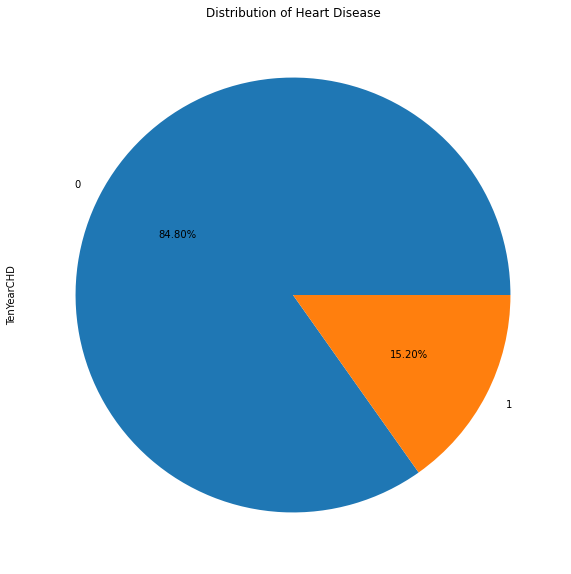

In [136]:
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
heart_df["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The above pie chart indicates that 15.20% of the population is suffering from the heart diseases whereas 84.80% population is healthy. 

<AxesSubplot:title={'center':'Male Distribution'}, ylabel='male'>

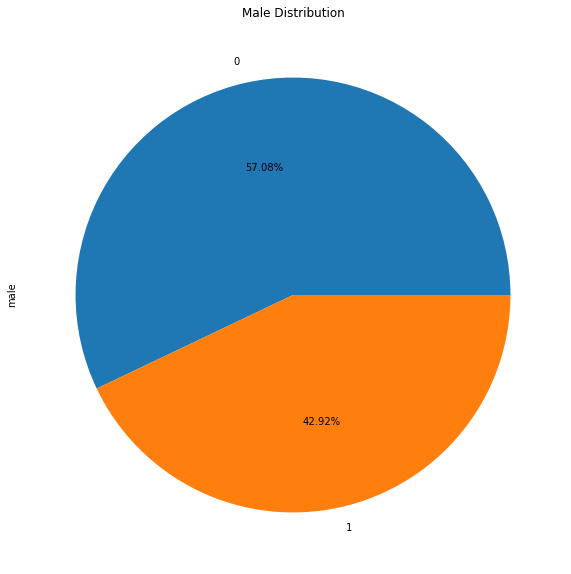

In [137]:
## Male population distribution
plt.figure(figsize=(10,10))
plt.title("Male Distribution")
heart_df["male"].value_counts().plot(kind="pie",autopct='%1.2f%%')

This dataset comprises of 42.92% of male population and 57.08% other genders. There is not much significant difference over the distribution of population.

<AxesSubplot:title={'center':'Smoker Distribution'}, ylabel='currentSmoker'>

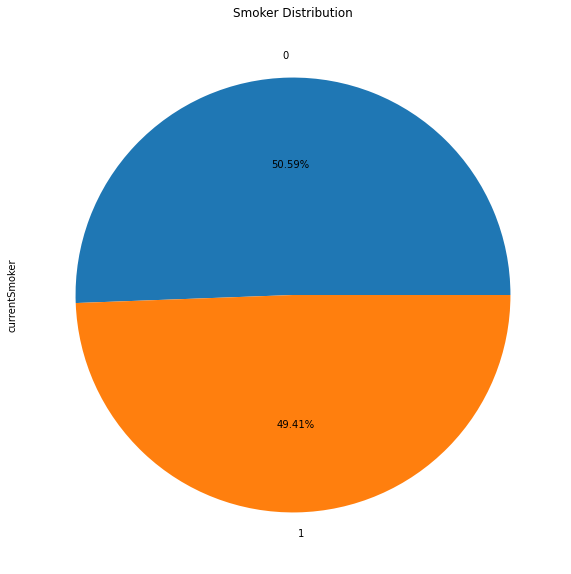

In [138]:
## Currently Smokers distribution
plt.figure(figsize=(10,10))
plt.title("Smoker Distribution")
heart_df["currentSmoker"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart indicates that 50.59% of the population currently are smokers and 49.41% are non smokers.
There is no significant difference between currently smokers and non smokers.

<AxesSubplot:title={'center':'Diabetes Distribution'}, ylabel='diabetes'>

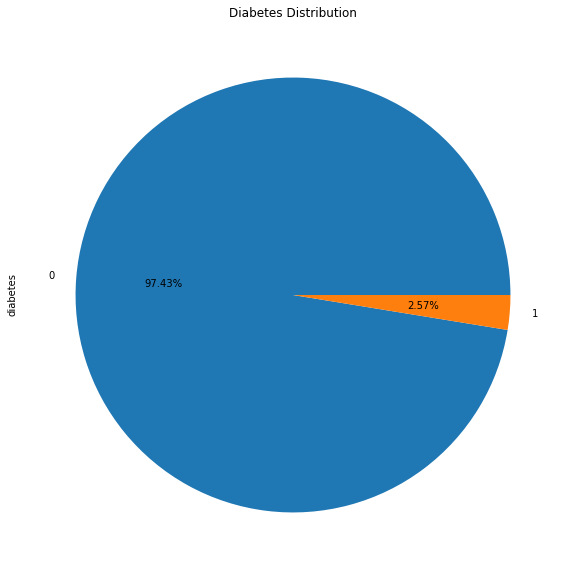

In [139]:
## Diabetes distribution
plt.figure(figsize=(10,10))
plt.title("Diabetes Distribution")
heart_df["diabetes"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart indicates that only 2.57% of the population in the dataset is diabetic, 97.43% population is healthy. This imbalance in the distribution can affect the machine learning algorithms negatively.

<AxesSubplot:title={'center':'BP Medicine'}, ylabel='BPMeds'>

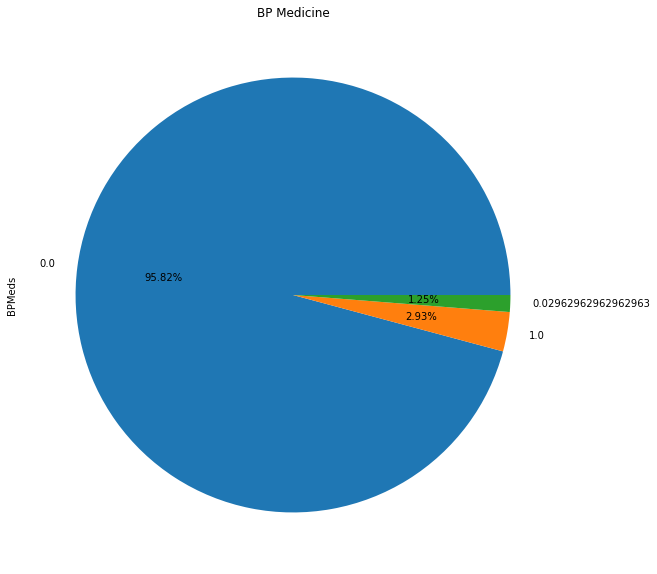

In [140]:
## BP Meds distribution
plt.figure(figsize=(10,10))
plt.title("BP Medicine")
heart_df["BPMeds"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 96% population doesnot take the BP Medicines.

<AxesSubplot:title={'center':'Stroke'}, ylabel='prevalentStroke'>

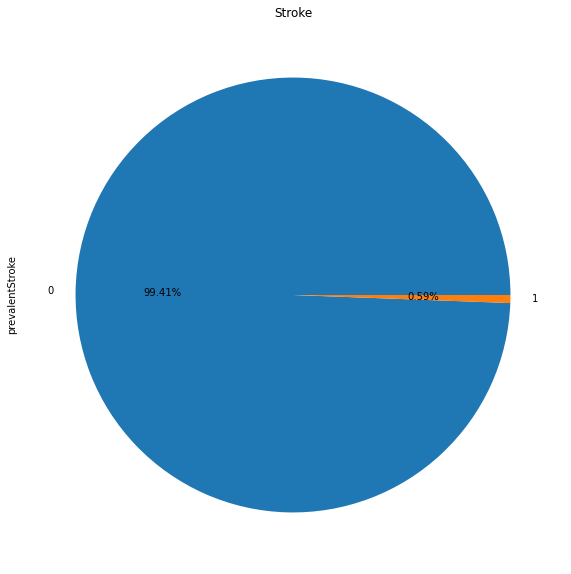

In [141]:
## stroke distribution
plt.figure(figsize=(10,10))
plt.title("Stroke")
heart_df["prevalentStroke"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 99% of the population is not suffering from prevalent Stroke.

<AxesSubplot:title={'center':'Hypertension'}, ylabel='prevalentHyp'>

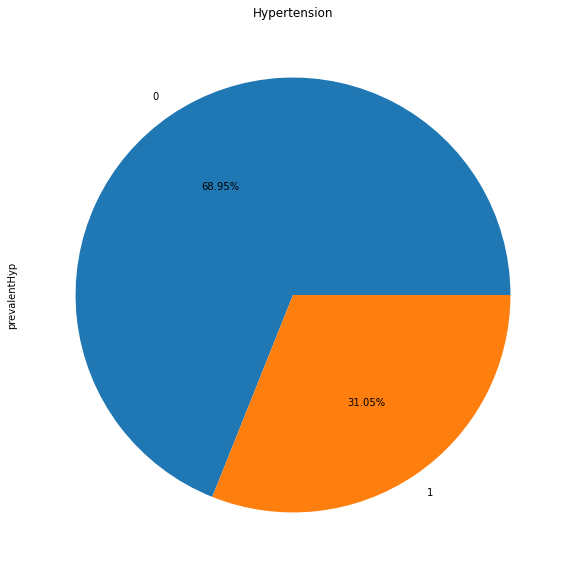

In [142]:
## Hypertension distribution
plt.figure(figsize=(10,10))
plt.title("Hypertension")
heart_df["prevalentHyp"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 31% of the population is suffering from Hypertension.

Text(0.5, 1.0, 'Heart Rate impact on Heart Disase')

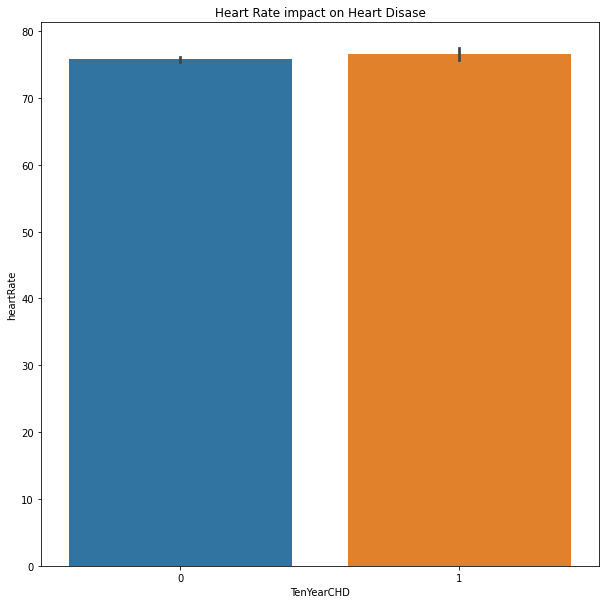

In [143]:
## bar plot to plot heart disease affect on heart rate
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="heartRate",data=heart_df)
plt.title("Heart Rate impact on Heart Disase")

According to the plot, heart rate doesnot have much impact on heart diseases.

Text(0.5, 1.0, 'Cholestrol impact on Heart Disase')

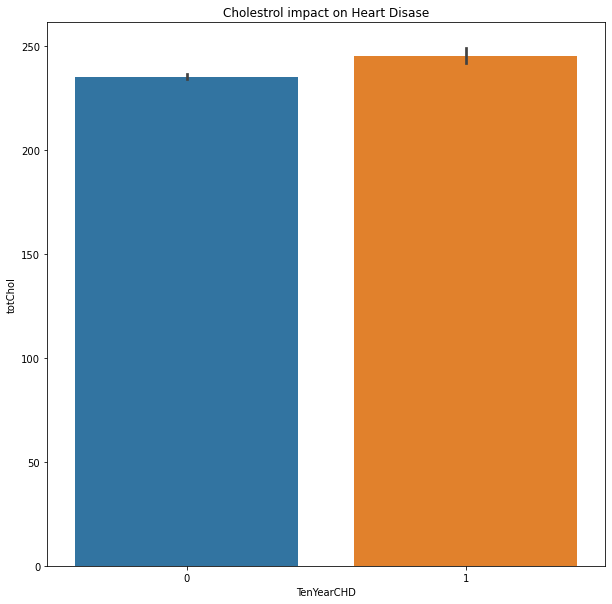

In [144]:
## bar plot to plot heart disease affect on Cholestrol
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="totChol",data=heart_df)
plt.title("Cholestrol impact on Heart Disase")

According to the plot, There is not much difference in Cholestrol level of population suffering from heart diseases and not suffering from it.

Text(0.5, 1.0, 'Glucose impact on Heart Disase')

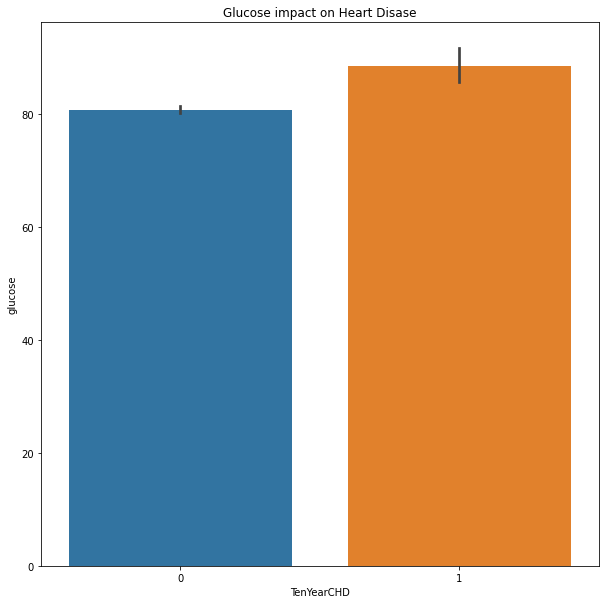

In [145]:
## bar plot to plot glucose level impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="glucose",data=heart_df)
plt.title("Glucose impact on Heart Disase")

According to the plot, the glucose level doesnot have significant difference on the heart diseases.

Text(0.5, 1.0, 'BMI impact on Heart Disase')

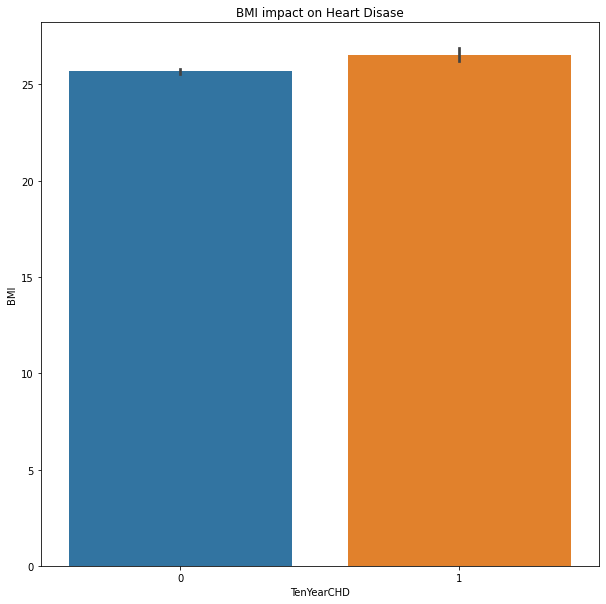

In [146]:
## bar plot to plot BMI impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="BMI",data=heart_df)
plt.title("BMI impact on Heart Disase")

According to the plot, BMI doesnot have significant difference on the heart diseses.

Text(0.5, 1.0, 'diaBP impact on Heart Disase')

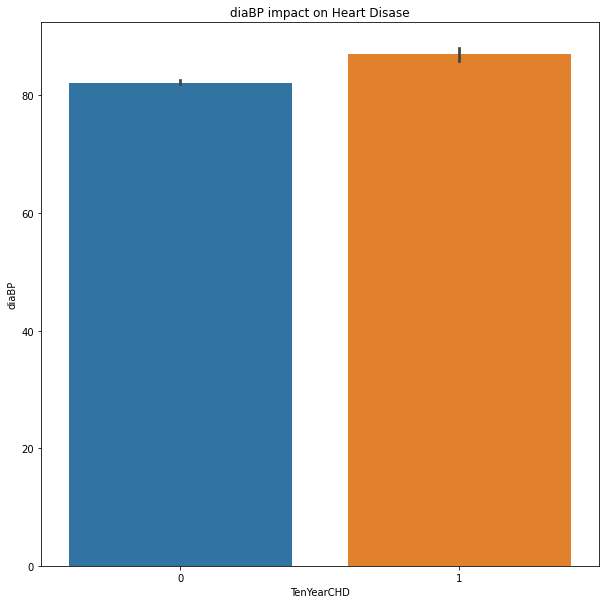

In [147]:
## bar plot to plot diaBp impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="diaBP",data=heart_df)
plt.title("diaBP impact on Heart Disase")

Text(0.5, 1.0, 'BP impact on Heart Disase')

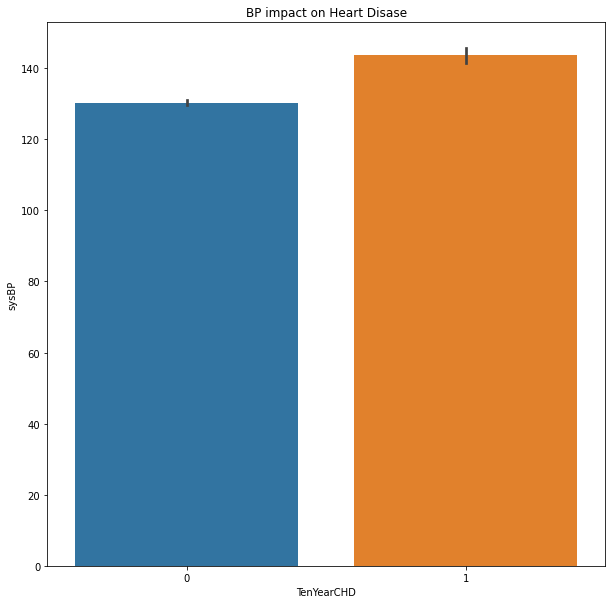

In [148]:
## bar plot to plot sysBP impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="sysBP",data=heart_df)
plt.title("BP impact on Heart Disase")

Text(0.5, 1.0, 'Ciagrettes impact on Heart Disase')

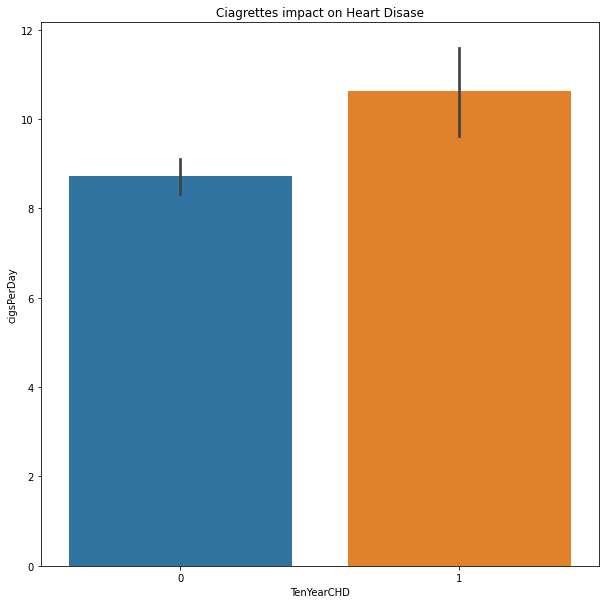

In [149]:
## bar plot to plot cigs per day impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="cigsPerDay",data=heart_df)

plt.title("Ciagrettes impact on Heart Disase")

According to the plot, the population with heart diseases smoke more ciagrettes per day than from the population not suffering from the heart diseases.

Text(0.5, 1.0, 'Stroke impact on Heart Disase')

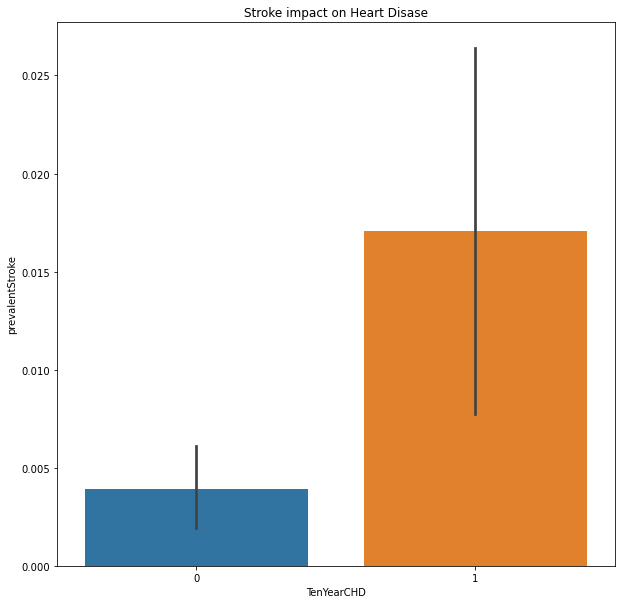

In [150]:
## bar plot to plot stroke impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="prevalentStroke",data=heart_df)

plt.title("Stroke impact on Heart Disase")

According to the plot, population suffering from Stroke has higher probability of suffering from heart diseses.

Text(0.5, 1.0, 'Hypertension impact on Heart Disase')

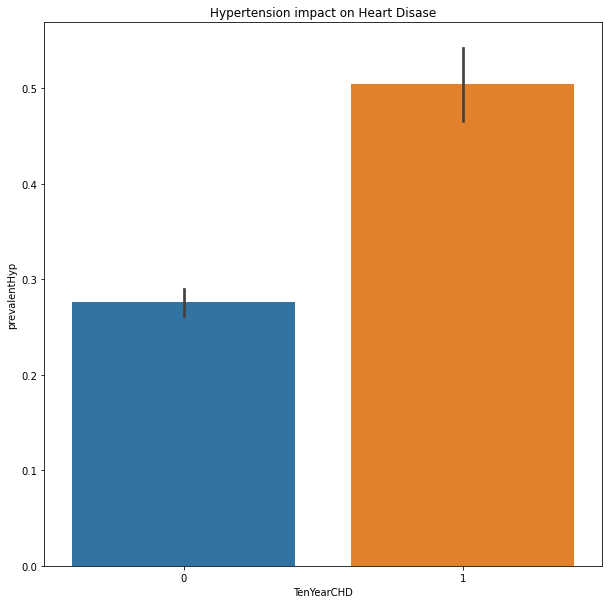

In [151]:
## bar plot to plot hypertension impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="prevalentHyp",data=heart_df)

plt.title("Hypertension impact on Heart Disase")

According to the plot, population suffering from Hypertension have higher chances of having Heart Diseases.

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for male')

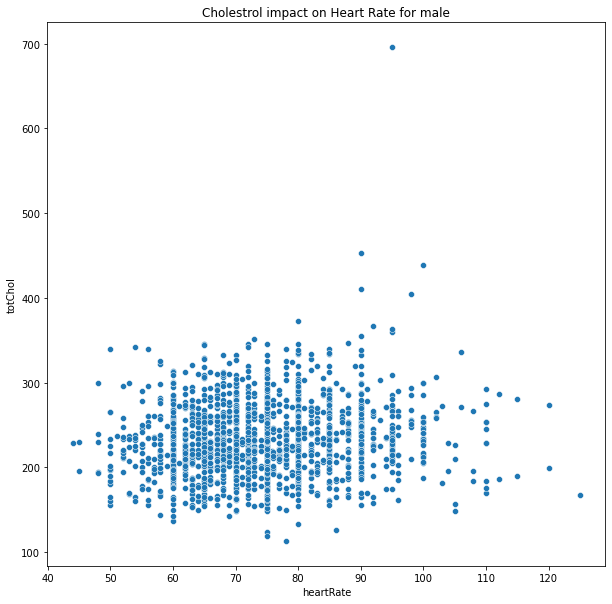

In [152]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=heart_df[heart_df.male==1])
plt.title("Cholestrol impact on Heart Rate for male")

According to the plot, the heart rate of the male population keeps on increasing, irrespective of the Cholestrol level.

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for female')

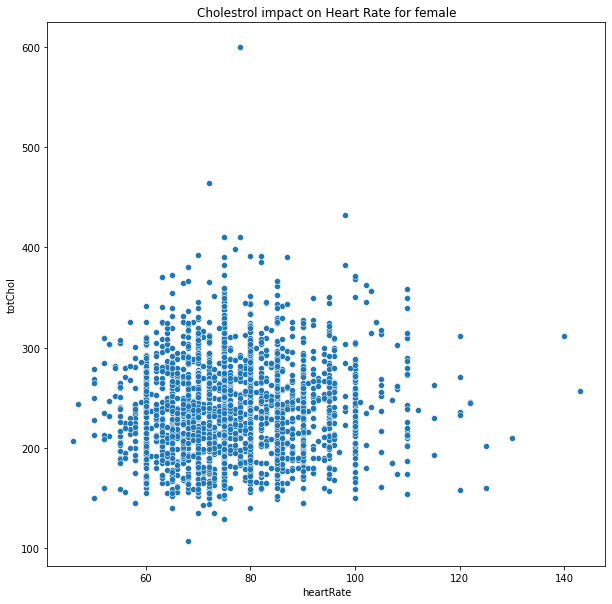

In [153]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=heart_df[heart_df.male==0])
plt.title("Cholestrol impact on Heart Rate for female")

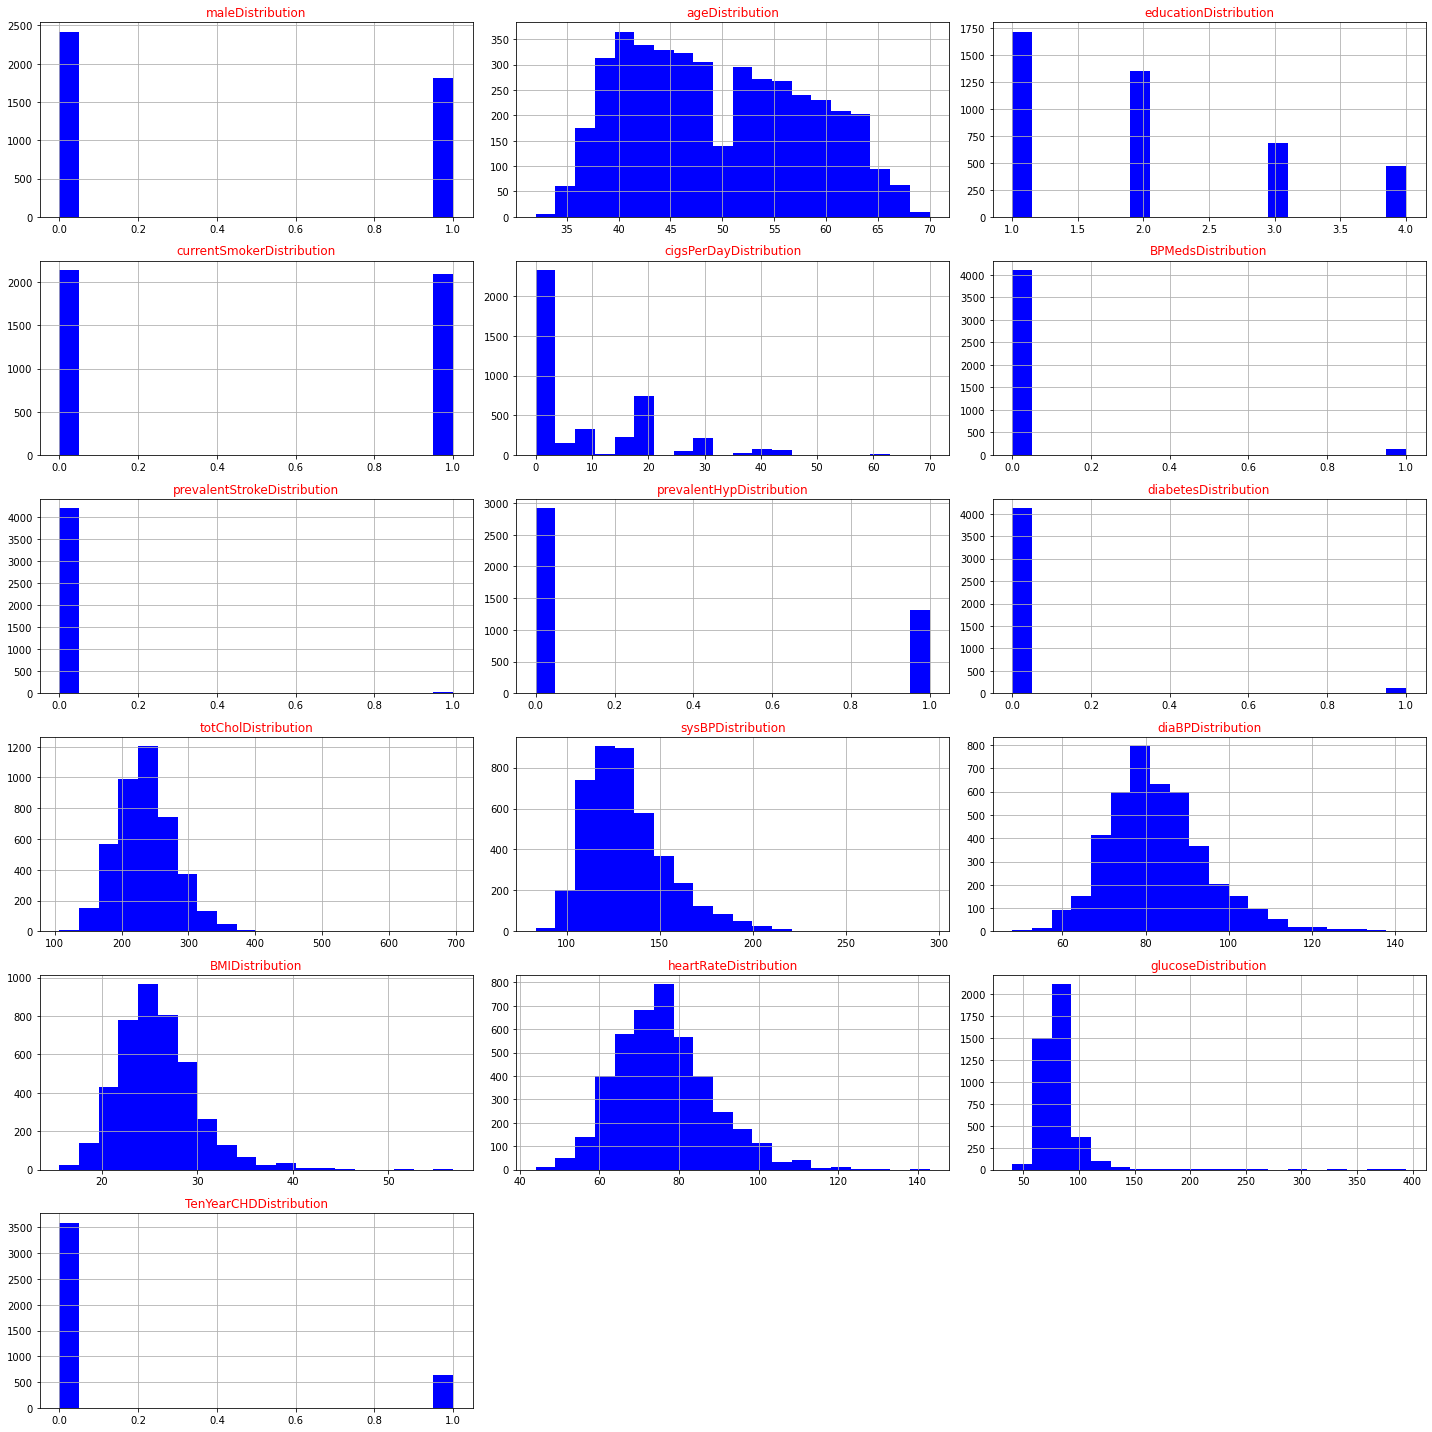

In [187]:
def draw_histogram(dataframe, features, rows , cols):
    fig = plt.figure(figsize = (20,20))
    for i , feature in enumerate(features):
        ax = fig.add_subplot(rows,cols, i+1)
        dataframe[feature].hist(bins=20, ax = ax, facecolor = 'blue')
        ax.set_title(feature+"Distribution",color='Red')
    fig.tight_layout()
    plt.show()
    
draw_histogram(heart_df,heart_df.columns,6,3)

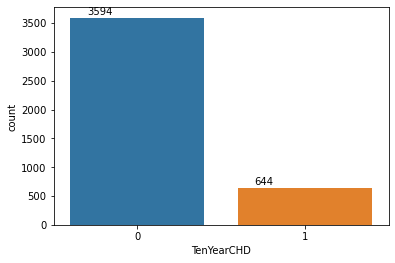

In [188]:
plt.Figure(figsize=(20,20))
ax = sns.countplot(x = 'TenYearCHD', data = heart_df)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

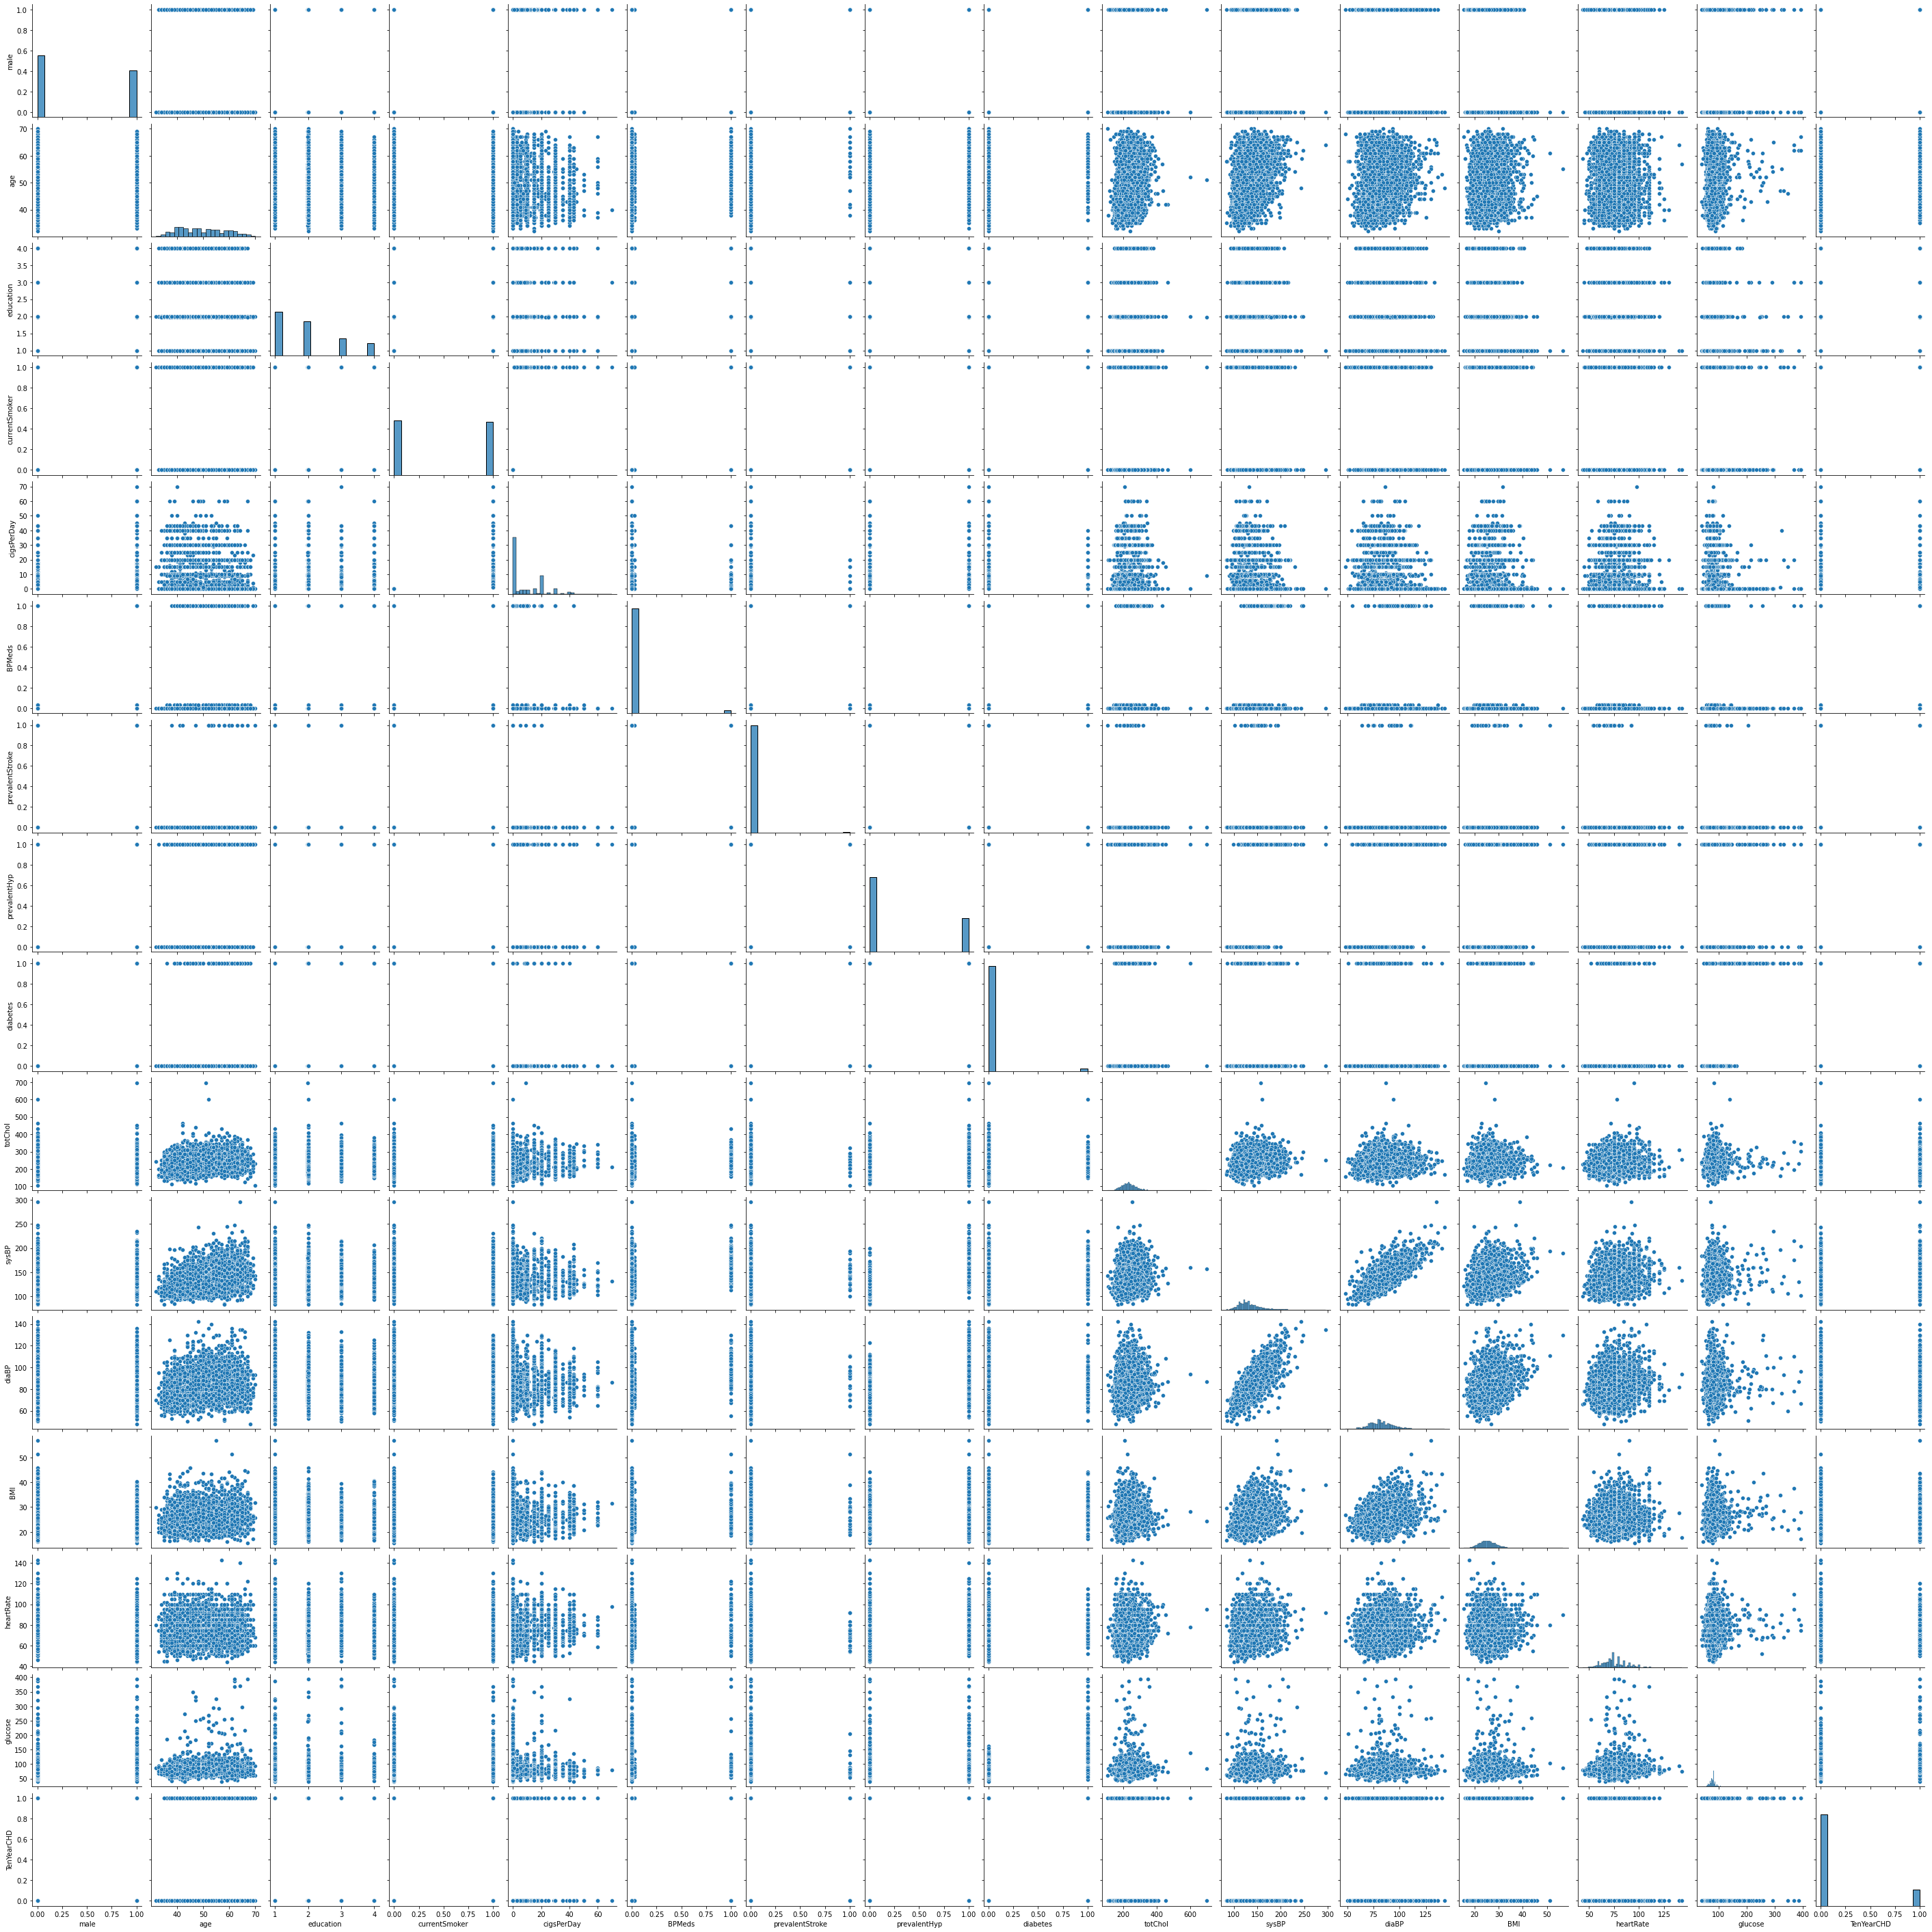

In [189]:
plt.Figure(figsize=(20,20))
sns.pairplot(data = heart_df)
plt.show()

# **SPLITTING DATA - TRAINING AND TESTING SETS**

In [190]:
## importing packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [191]:
## Defining variables X,y 
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64
shape of X: (4238, 15)
shape of y: 4238


In [192]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1060,)
(3178, 15)
(1060, 15)
(3178,)


# **MODEL TRAINING**

In [193]:
## Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [158]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [194]:
## Predicting data
y_pred=model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(1060,)
(1060,)


In [195]:
## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.65      0.06      0.12       170

    accuracy                           0.84      1060
   macro avg       0.75      0.53      0.52      1060
weighted avg       0.82      0.84      0.79      1060



Confusion matrix is 
 [[884   6]
 [159  11]]


Text(42.0, 0.5, 'predicted label')

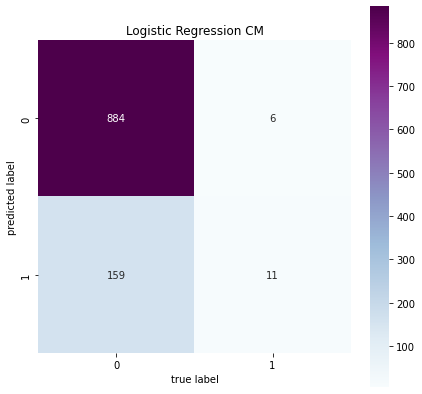

In [161]:
## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [162]:
## accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred))

## percentage accurate
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.8443396226415094
accuracy: 84.0 %


**PREDICT PROBA**

In [196]:
## Prediction using predict_proba 

y_pred_proba = model.predict_proba(X_test)[:,1]

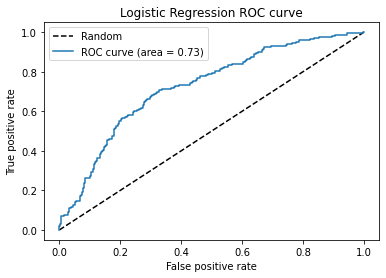

In [197]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

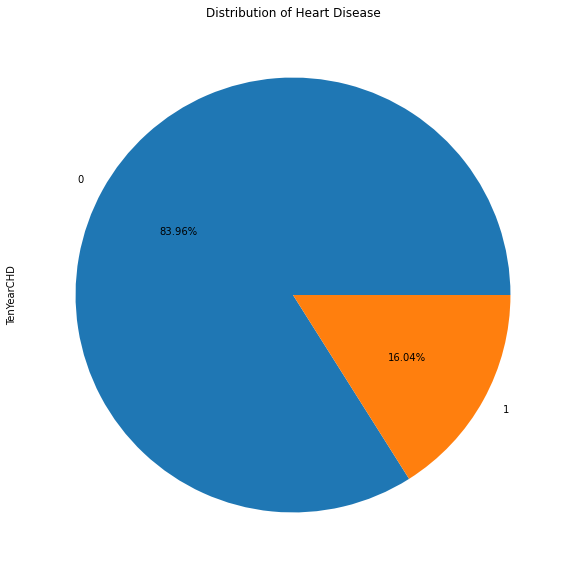

In [165]:
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
y_test.value_counts().plot(kind="pie",autopct='%1.2f%%')

# **OVERSAMPLING USING - SMOTE**

> SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

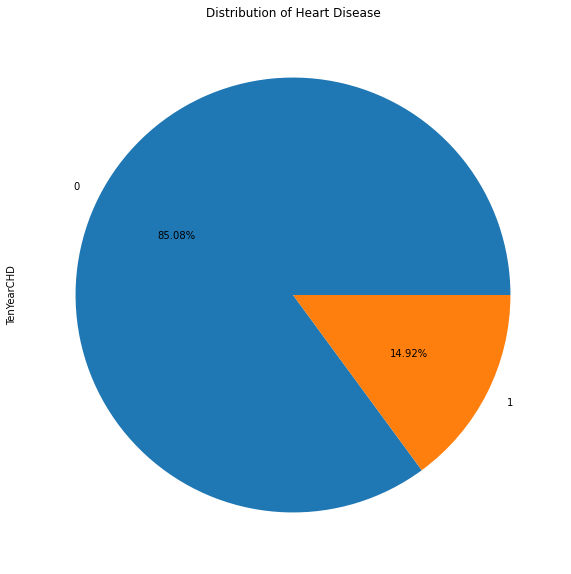

In [198]:
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
y_train.value_counts().plot(kind="pie",autopct='%1.2f%%')

The plot depicts that y_train is not perfectly distributed. SMOTE helps to resample the perfectly sampled data.

In [199]:
## resampling for perfectly balanced data
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote_X,smote_y=smote.fit_resample(X_train,y_train)


<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

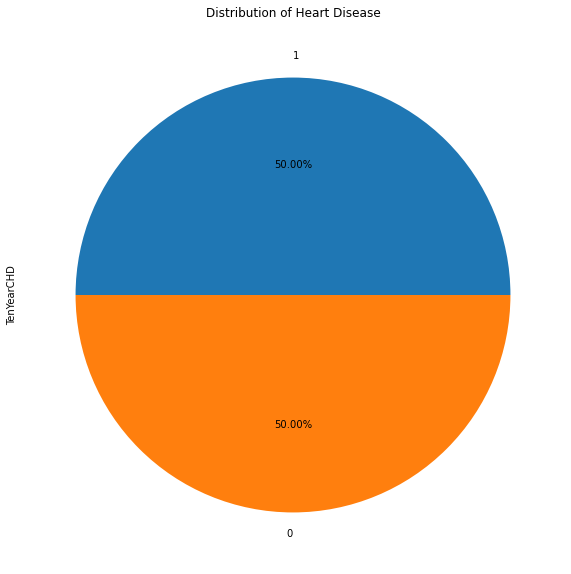

In [168]:
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
smote_y.value_counts().plot(kind="pie",autopct='%1.2f%%')

The data is perfectly balanced. Now we can predict the data.

In [169]:
## Logistic Regression
model_smote=LogisticRegression()
model_smote.fit(smote_X,smote_y)

LogisticRegression()

In [170]:
y_pred_smote=model_smote.predict(X_test)

In [171]:
## classification report
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       890
           1       0.29      0.68      0.41       170

    accuracy                           0.69      1060
   macro avg       0.61      0.68      0.60      1060
weighted avg       0.82      0.69      0.73      1060



Confusion matrix is 
 [[611 279]
 [ 54 116]]


Text(42.0, 0.5, 'Actual value')

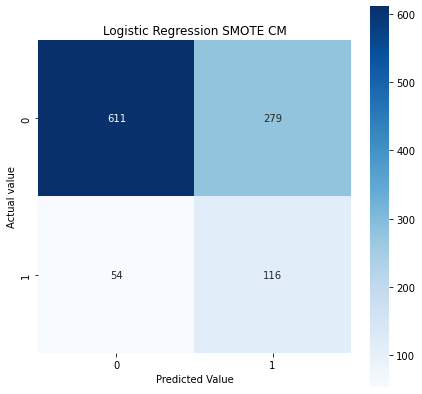

In [172]:
## confusion matrix
conf_mat_smote=confusion_matrix(y_test,y_pred_smote)
print("Confusion matrix is \n",conf_mat_smote)

## plotting confusion matrix

plt.figure(figsize=(7,7))
plt.title("Logistic Regression SMOTE CM")
sns.heatmap(conf_mat_smote, square=True,cmap="Blues",annot=True,fmt='d')
plt.xlabel("Predicted Value")
plt.ylabel("Actual value")

In [173]:
## accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred_smote))

## percentage accurate
print("accuracy:", round(100*accuracy_score(y_test,y_pred_smote)),"%")

accuracy score :  0.6858490566037736
accuracy: 69.0 %


In [174]:

## Prediction using predict_proba 

y_pred_proba_smote = model_smote.predict_proba(X_test)[:,1]

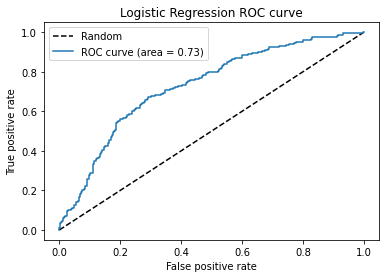

In [175]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_smote)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

Accuracy rate without SMOTE IS 84%
Accuracy rate with SMOTE is 68%

# ****RECRUSIVE ELIMATION FEATURE****

> It is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [176]:
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X.columns[rfe.support_]

[ True  True False False  True False False  True False False  True  True
 False False  True]
[1 1 9 6 1 8 3 1 5 2 1 1 4 7 1]


Index(['male', 'age', 'cigsPerDay', 'prevalentHyp', 'sysBP', 'diaBP',
       'glucose'],
      dtype='object')

In [177]:
cols=['male', 'age', 'cigsPerDay', 'prevalentHyp', 'sysBP', 'diaBP','glucose']
X=X_train[cols]

In [178]:
import statsmodels.api as sm
logit_model=sm.Logit(np.asarray(y_train),np.asarray(X))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.668087
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.586   
Dependent Variable: y                AIC:              4260.3594
Date:               2022-04-08 00:52 BIC:              4302.8075
No. Observations:   3178             Log-Likelihood:   -2123.2  
Df Model:           6                LL-Null:          -1338.7  
Df Residuals:       3171             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1     0.0949      0.0388     2.4430    0.0146     0.0188    0.1710
x2     0.2401      0.0411     5.8394    0.0000     0.1595    0.320

The p value of the most variables is less than 0.05 except two variables, we will remove them.

In [179]:
cols=['male', 'age', 'cigsPerDay', 'sysBP','glucose']
X_new=X[cols]

In [180]:

logit_model=sm.Logit(np.asarray(y_train),np.asarray(X_new))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.668739
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.588   
Dependent Variable: y                AIC:              4260.5064
Date:               2022-04-08 00:52 BIC:              4290.8265
No. Observations:   3178             Log-Likelihood:   -2125.3  
Df Model:           4                LL-Null:          -1338.7  
Df Residuals:       3173             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       0.0878      0.0383    2.2883    0.0221    0.0126    0.1629
x2       0.2541      0.0404    6.2925    0.0000    0.1749    0.333

All the p values are less than 0.05.
All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

The variables are:-
1. male 
2. age
3. cigsPerDay
4. sysBP
5. glucose


In [181]:
cols=['male', 'age', 'cigsPerDay', 'sysBP','glucose','TenYearCHD']
heart=heart_df[cols]
## Splitting data '
X_n= heart.drop("TenYearCHD",axis=1)
y_n=heart["TenYearCHD"]
X_n.shape
y_n.shape[0]

4238

In [182]:
## Splitting data into training and test sets
X_n_train, X_n_test, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.25, random_state = 0)

In [183]:
sc= StandardScaler()
X_n_train = sc.fit_transform(X_n_train)
X_n_train=pd.DataFrame(X_n_train,columns=X_n.columns)
X_n_test=sc.transform(X_n_test)
X_n_test=pd.DataFrame(X_n_test,columns=X_n.columns)

In [184]:
## Training the model using Logistic Regression
model_n=LogisticRegression()
model_n.fit(X_n_train,y_train_n)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.47      0.05      0.10       170

    accuracy                           0.84      1060
   macro avg       0.66      0.52      0.50      1060
weighted avg       0.79      0.84      0.78      1060

accuracy score :  0.8386792452830188
accuracy: 84.0 %
Confusion matrix is 
 [[880  10]
 [161   9]]


Text(42.0, 0.5, 'predicted label')

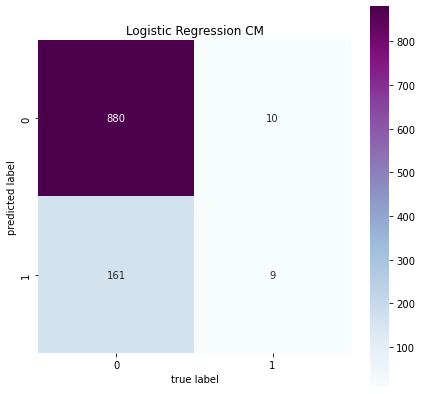

In [185]:
## Predicting data
y_pred_n=model_n.predict(X_n_test)

## classification report
print(classification_report(y_test_n,y_pred_n))
## accuracy score
print("accuracy score : ",accuracy_score(y_test_n,y_pred_n))

## percentage accurate
print("accuracy:", round(100*accuracy_score(y_test_n,y_pred_n)),"%")

## confusion matrix
conf_mat_n=confusion_matrix(y_test_n,y_pred_n)
print("Confusion matrix is \n",conf_mat_n)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat_n, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

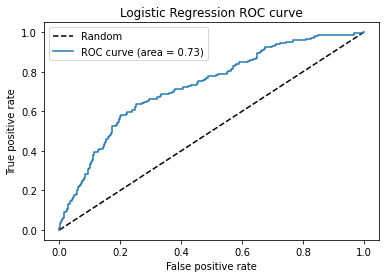

In [186]:
## Prediction using predict_proba 
y_pred_proba_n = model_n.predict_proba(X_n_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_n, y_pred_proba_n)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

# **CONCLUSION**

• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day, glucose and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.84 accuracy. The model is more specific than sensitive. Overall model could be improved with more data